<a href="https://colab.research.google.com/github/takemyt1me/DL_practice/blob/main/MNIST_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data() #return data

# plt.matshow(x_train[1]) #show image
# print(y_train[1])
x_train = x_train/255
x_test = x_test/255

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

# print(x_train_flattened.shape) #reshape data to 1-dimensional
# print(x_test_flattened.shape)

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #add hidden layer
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

model.evaluate(x_test_flattened, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8683 - loss: 0.4610
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9615 - loss: 0.1332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9805 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9847 - loss: 0.0515
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9683 - loss: 0.0984


[0.08882378786802292, 0.9722999930381775]

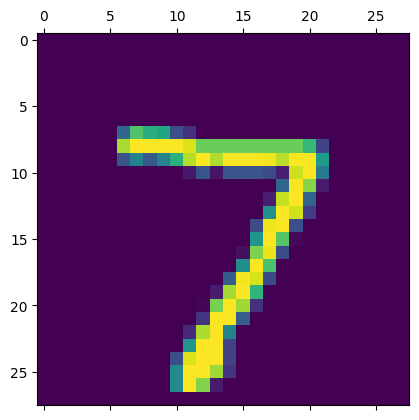

In [18]:
plt.matshow(x_test[0])

In [34]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([5.3736218e-03, 1.0214021e-04, 4.1446716e-01, 8.5935110e-01,
       9.3424359e-07, 1.9579893e-02, 1.4104471e-07, 9.9978483e-01,
       6.2981576e-02, 2.1120143e-01], dtype=float32)

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm #confusion matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    2,    1,    0,    1,    3,    3,    0],
       [   0, 1109,    4,    2,    0,    1,    3,    0,   16,    0],
       [   3,    0, 1003,   10,    2,    0,    0,    2,   12,    0],
       [   0,    0,    1,  998,    0,    1,    0,    3,    7,    0],
       [   4,    0,    3,    1,  944,    0,    3,    7,    5,   15],
       [   4,    0,    1,   16,    1,  862,    2,    0,    6,    0],
       [   4,    1,    2,    2,    2,    4,  939,    0,    4,    0],
       [   0,    3,   17,   10,    1,    0,    0,  985,    6,    6],
       [   2,    0,    5,   11,    1,    5,    2,    1,  946,    1],
       [   2,    3,    2,   13,    4,    3,    1,    5,    9,  967]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

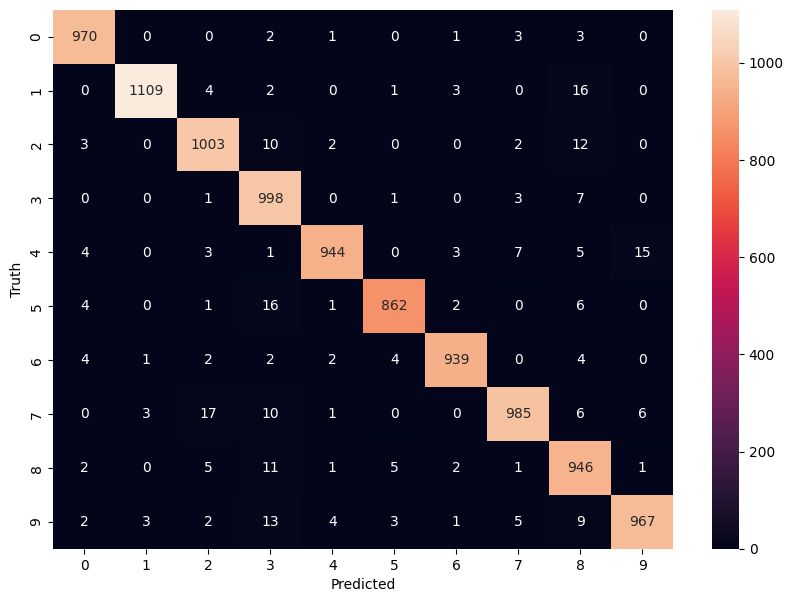

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')